# 01 Example - Property Scans with Point Data

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Define a measure function

In [3]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2, and v3 devices. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage
    d.v2_readout = devices.v2.voltage
    d.v3_readout = devices.v3.voltage

    d.vsum = d.v1_readout + d.v2_readout + d.v3_readout
    
    return d

## Experiments

### 1. 1D Scan, point data

In [4]:
# Create RunInfo instance and set loop0 to PropertyScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

# Set RunInfo measure_function (remember, it takes a Sweep object as a parameter and 
# returns an ItemAttribute containing data). This function is run every time the experiment iterates one scan variable.
runinfo.measure_function = get_voltage_data

# Create a Sweep class with the RunInfo and Devices just created
expt = ps.Sweep(runinfo, devices, time=True)
expt.start_thread()


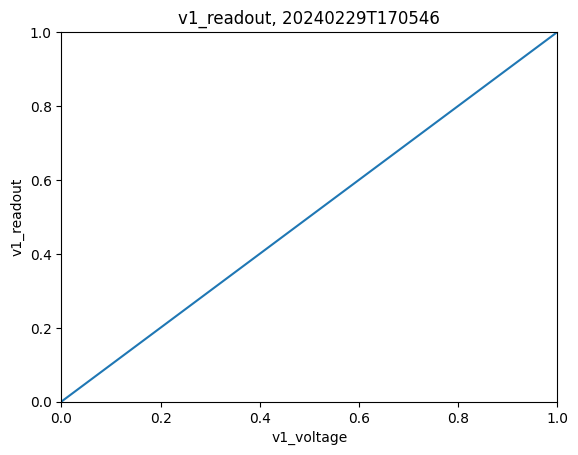

In [5]:
ps.live_plot1D(expt, data_name="v1_readout")

### 2. 2D Scan, point data

In [6]:
# Create RunInfo instance and set loop0 and loop1 to PropertyScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.05, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


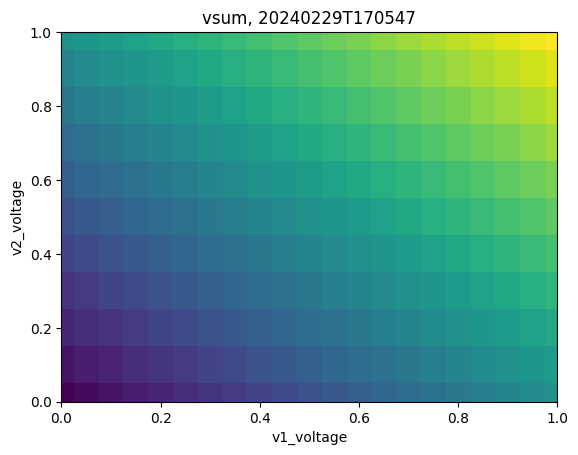

In [7]:
ps.live_plot2D(expt, data_name="vsum")

### 3. 2D Scan with 2 instruments in loop0, point data

This is useful to change two properties at once. For example, changing a variable on two different devices, simultaneously.

In [8]:
# 2D data, 2 instruments in loop0
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1),
                                 'v3': ps.drange(5, -0.2, 3)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


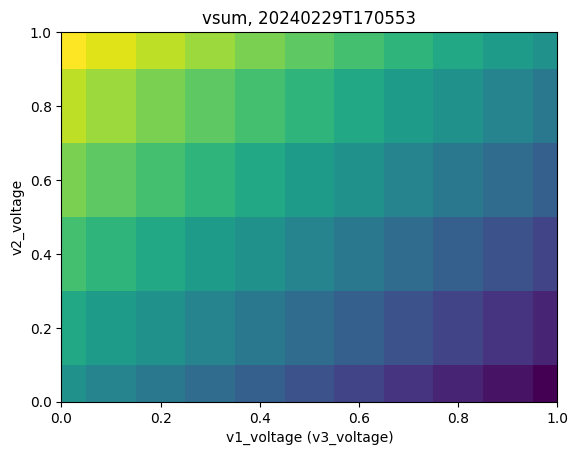

In [9]:
ps.live_plot2D(expt, data_name="vsum")